# Backgammon 
Group Members: Anshuman, Frank, Phillip


We will be analyzing the final stage of the game of Backgammon as can be seen in the following Image

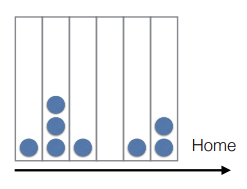



To optimize expected value of steps:
follow policy $$\pi(s) = \text{argmax}_aq(s,a)$$

### A. Set up as a DP problem
$$V(s) = \max_{a\in A(s)}\left\{r(s,a)+\sum_{s'\in T(s,a)}p(s'|s,a)V(s')\right\}$$

STATES: (col1, col2, col3, col4, col5, col6, dice1, dice2)\
ACTIONS: (col, dest) x2\
TRANSITIONS: We make the moves from action, then any combination of dice\
REWARDS: -1 if not terminal state, 100 for terminal

In [2]:
import numpy
import matplotlib
import random
from tqdm import tqdm

beginning_state = [1,3,1,0,1,2]
curr_state = beginning_state

roll = lambda:random.randint(1,6)

def T(s,a):
    *cols, _, _ = s
    cols = [None]+cols
    for action in a:
        cols = _updateCols(cols, action)
    return [tuple([*cols[1:],d1,d2]) for d1 in range(1,7) for d2 in range(1,7)]

def r(s,a):
    return -1
    # if sum(s[0:-2])==0:
    #     return 100
    # else:
    #     return -1

# if Dice >= maxColVal then it can move any piece home
# else it can move any piece, foward "Dice" places forward (unless it will make it home)

def _A1dice(cols, dice):
    # actions given one dice
    if sum(cols[1:]) == 0:
        return [None]
    leftmost = 6
    while cols[leftmost]==0:
        leftmost-=1
    
    if dice > leftmost:
        return [(i, 0) for i in range(1, 7) if cols[i]]
    return [(i, max(i-dice,0)) for i in range(dice,7) if cols[i]]
    
def _updateCols(cols, a1):
    if a1 == None:
        return tuple(cols)
    new_cols = list(cols)
    col, dest = a1
    new_cols[col]-=1
    if dest:
        new_cols[dest]+=1
    return tuple(new_cols)

def A(s):
    # Get actions given state s
    *cols, d1, d2 = [None] + list(s)
    possibleActions = set()

    for a1 in _A1dice(cols, d1):
        ncols = _updateCols(cols, a1)
        for a2 in _A1dice(ncols, d2):
            possibleActions |= {(a1,a2)}
    for a1 in _A1dice(cols, d2):
        ncols = _updateCols(cols, a1)
        for a2 in _A1dice(ncols, d1):
            possibleActions |= {(a1,a2)}

    return tuple(possibleActions)
    # print(f"{_A1dice(cols,d1)=}")
    # print(f"{_A1dice(cols,d2)=}")

def value_iteration(V, iterations = 1000, threshold = 0):
    """
    s: state, form (col1,col2,col3,col4,col5,col6,dice1,dice2)
    a: action, form ((col, destination),(col, destination))
    """
    def q(s,a):
        # if sum(s[:-2]) == 0:
        #     return r()
        states = T(s,a)
        val = 0
        for s in states:
            val += V[s]
        return (val / len(states)) + r(s,a)
    changes = threshold
    prog = tqdm(range(iterations))
    for it in prog:
        changes = 0
        for s in V:
            if sum(s[:-2]) == 0:
                V[s] = 100
            else:
                old = V[s]
                V[s] = max(q(s,a) for a in A(s))
                changes += abs(V[s]-old)
        prog.set_description(f"{changes=}")
        if changes <= threshold:
            break
    policy = {}
    for s in V:
        action, val = None, float('-inf')
        for a in A(s):
            if q(s,a) > val:
                val = q(s,a)
                action = a
        policy[s] = action
    return policy

### Creating all possible states

In [3]:
V = {}
possible_cols = set()

pieces = 8
for c1 in range(0,pieces+1):
	for c2 in range(0,pieces+1-c1):
		for c3 in range(0,pieces+1-c1-c2):
			for c4 in range(0,pieces+1-c1-c2-c3):
				for c5 in range(0,pieces+1-c1-c2-c3-c4):
					for c6 in range(0,pieces+1-c1-c2-c3-c4-c5):
						possible_cols|={(c1,c2,c3,c4,c5,c6)}

for col in possible_cols:
	for d1 in range(1,7):
		for d2 in range(1,7):
			V[tuple(list(col)+[d1,d2])]=0

Doing Value Iteration

In [4]:
policy = value_iteration(V, iterations = 5000, threshold = 0)

changes=0.0:   0%|          | 14/5000 [02:33<15:13:59, 11.00s/it]                   


### Visualization and simulations

In [9]:
def visualize(policy, state):
	action = policy[state]
	for y in range(8,-1,-1):
		for i in range(6,0,-1):
			print("O" if state[i]-1>=y else " ",end=" ")
		print()
	print(f"6 5 4 3 2 1\t  Dice rolls: {state[-2]},{state[-1]}")
    
    # for a in action
	for src, dest in action:
		print(f"Move from {src} to {dest}")

In [10]:
visualize(policy, random.choice(list(policy.keys())))

            
            
            
            
            
            
            
O O O       
O O O O O   
6 5 4 3 2 1	  Dice rolls: 2,4
Move from 4 to 0
Move from 6 to 4
